In [ ]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [1]:
from fastai.vision.all import *

In [2]:
import matplotlib.pyplot as plt

In [4]:
import zipfile
with zipfile.ZipFile("/content/LEGO brick images v1.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/lego_data")

In [5]:
from pathlib import Path

path = Path("/content/lego_data")
path.ls()

(#16) [Path('/content/lego_data/3713 Bush for Cross Axle'),Path('/content/lego_data/3794 Plate 1X2 with 1 Knob'),Path('/content/lego_data/3005 Brick 1x1'),Path('/content/lego_data/11214 Bush 3M friction with Cross axle'),Path('/content/lego_data/3003 Brick 2x2'),Path('/content/lego_data/3023 Plate 1x2'),Path('/content/lego_data/3673 Peg 2M'),Path('/content/lego_data/6632 Technic Lever 3M'),Path('/content/lego_data/18651 Cross Axle 2M with Snap friction'),Path('/content/lego_data/2357 Brick corner 1x2x2'),Path('/content/lego_data/3022 Plate 2x2'),Path('/content/lego_data/3069 Flat Tile 1x2'),Path('/content/lego_data/3024 Plate 1x1'),Path('/content/lego_data/3004 Brick 1x2'),Path('/content/lego_data/32123 half Bush'),Path('/content/lego_data/3040 Roof Tile 1x2x45deg')]

In [6]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = dblock.dataloaders(path)

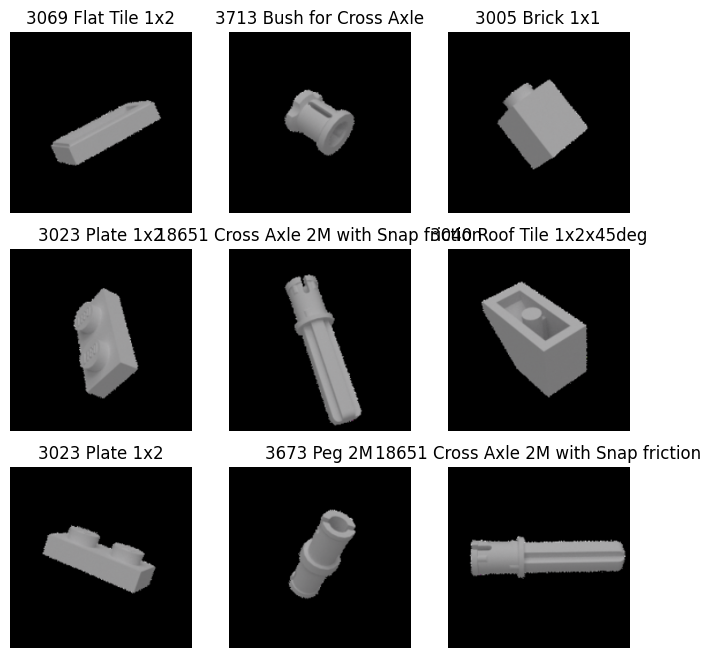

In [7]:
dls.show_batch(max_n=9, figsize=(8,8))

In [29]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

In [30]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.539436,0.348307,0.878431,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.349409,0.221750,0.922353,00:28
1,0.239089,0.116482,0.961569,00:29
2,0.123201,0.089706,0.972549,00:28
3,0.044599,0.031217,0.987451,00:28
4,0.016939,0.031241,0.988235,00:28


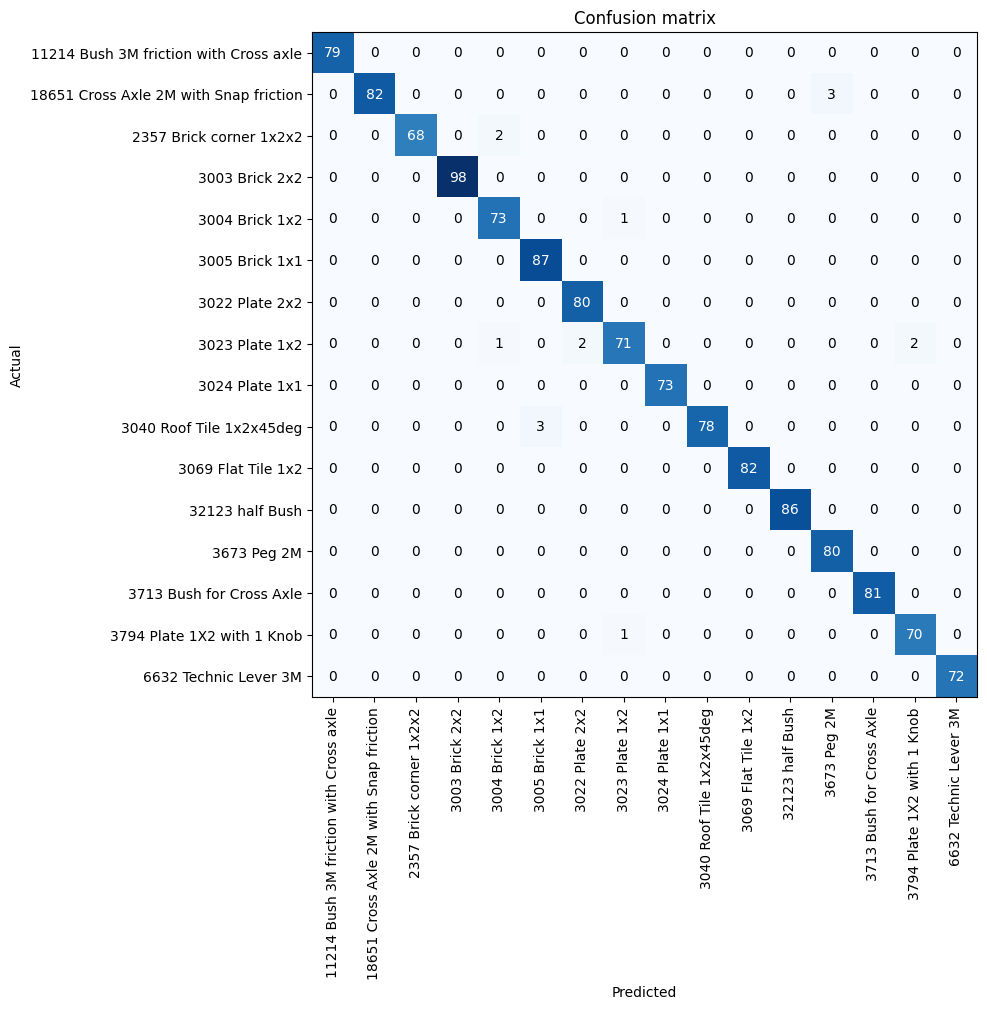

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

SuggestedLRs(valley=1.2022644114040304e-05)

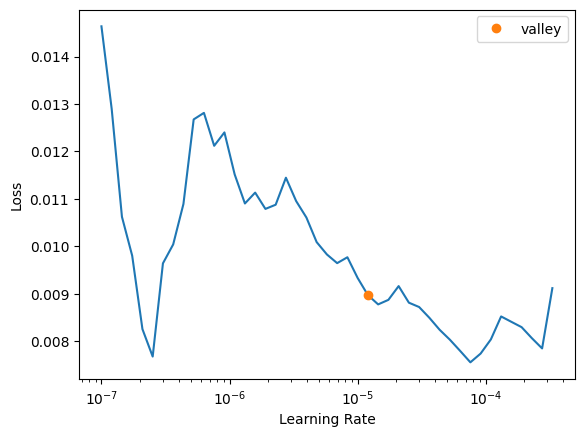

In [33]:
learn.lr_find()

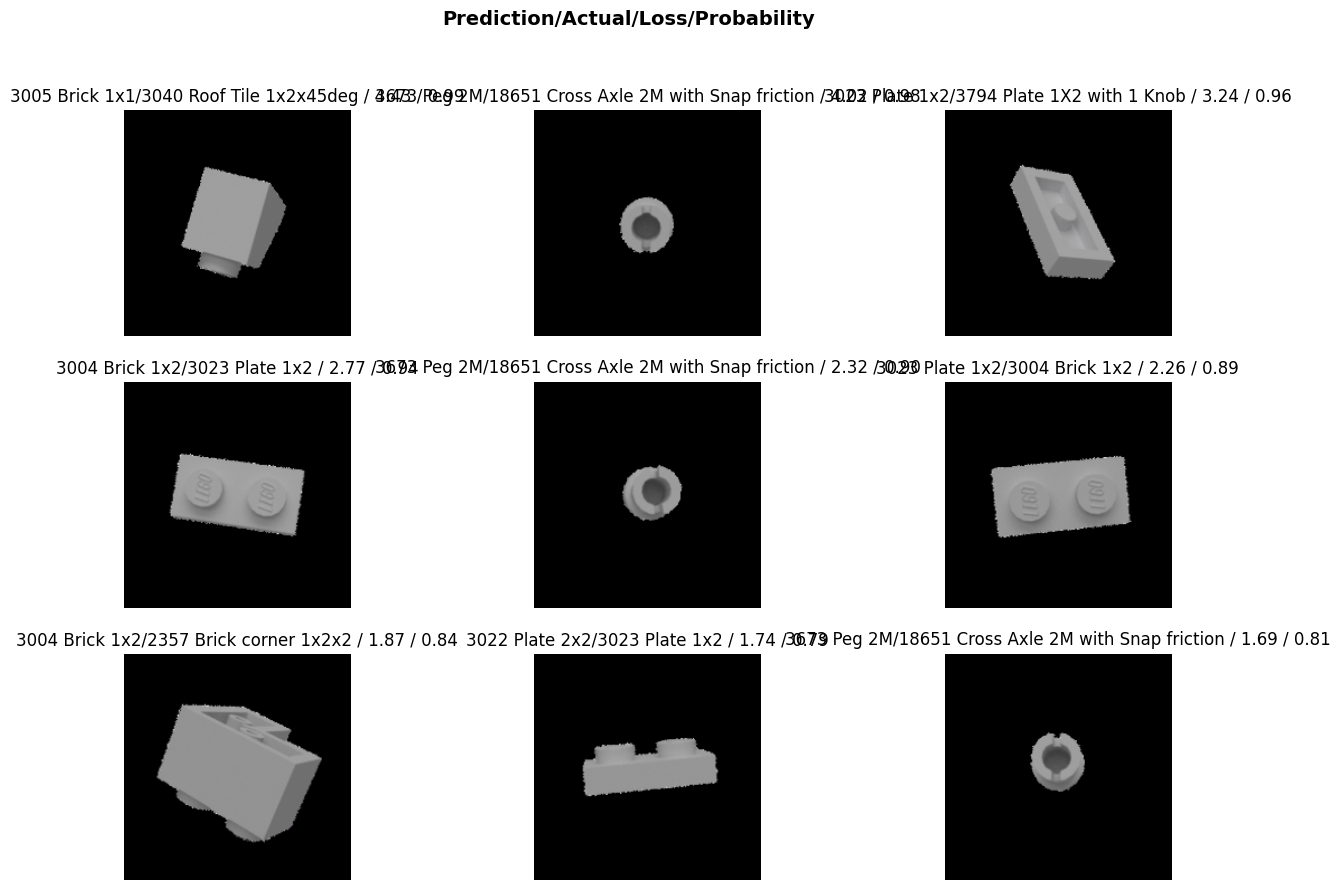

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

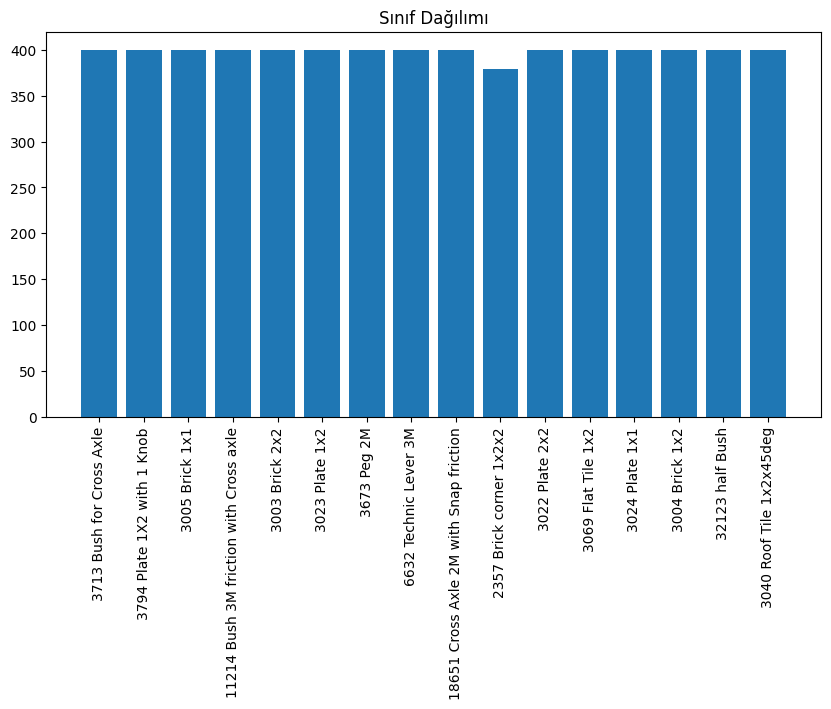

In [40]:
from collections import Counter

labels = [parent_label(f) for f in get_image_files(path)]
label_counts = Counter(labels)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(rotation=90)
plt.title("Sınıf Dağılımı")
plt.show()

In [43]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [44]:
learn.export('model.pkl')

In [45]:
learn = load_learner('model.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
